In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('insurance.csv')

In [4]:
# One-hot encode categorical variables: sex, smoker, region
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split the dataset into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

In [5]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

# Evaluate Linear Regression
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

print(f"Linear Regression - MAE: {linear_mae}, MSE: {linear_mse}, R2: {linear_r2}")

Linear Regression - MAE: 4181.194473753651, MSE: 33596915.85136145, R2: 0.7835929767120724


In [7]:
# Ridge and Lasso with Cross-Validation
alpha_range = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Ridge Regression
ridge_grid = GridSearchCV(Ridge(), alpha_range, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_best_alpha = ridge_grid.best_params_['alpha']
ridge_y_pred = ridge_grid.predict(X_test)

# Evaluate Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print(f"Ridge Regression - Best Alpha: {ridge_best_alpha}, MAE: {ridge_mae}, MSE: {ridge_mse}, R2: {ridge_r2}")

Ridge Regression - Best Alpha: 1, MAE: 4193.585298299824, MSE: 33645037.09177902, R2: 0.7832830144988215


In [8]:
# Lasso Regression
lasso_grid = GridSearchCV(Lasso(), alpha_range, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
lasso_best_alpha = lasso_grid.best_params_['alpha']
lasso_y_pred = lasso_grid.predict(X_test)

# Evaluate Lasso Regression
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print(f"Lasso Regression - Best Alpha: {lasso_best_alpha}, MAE: {lasso_mae}, MSE: {lasso_mse}, R2: {lasso_r2}")

Lasso Regression - Best Alpha: 100, MAE: 4268.401151371228, MSE: 34245278.345488146, R2: 0.7794166946394485


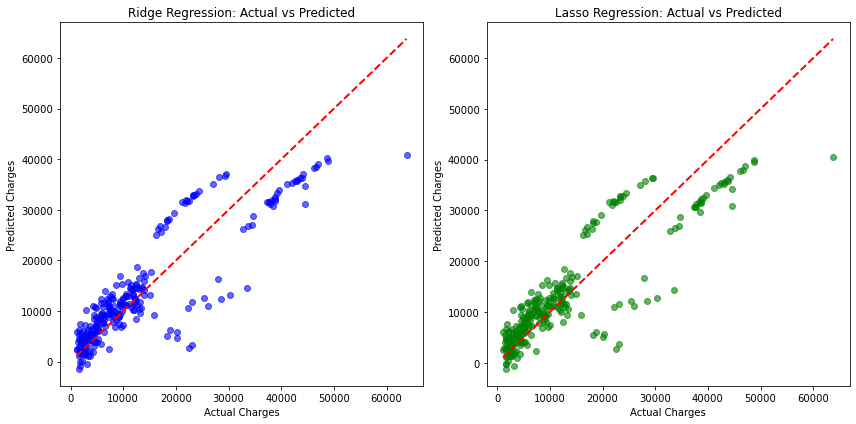

In [10]:
# Plotting actual vs predicted for Ridge and Lasso regression
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Ridge plot
axs[0].scatter(y_test, ridge_y_pred, color='blue', alpha=0.6)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axs[0].set_title('Ridge Regression: Actual vs Predicted')
axs[0].set_xlabel('Actual Charges')
axs[0].set_ylabel('Predicted Charges')

# Lasso plot
axs[1].scatter(y_test, lasso_y_pred, color='green', alpha=0.6)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axs[1].set_title('Lasso Regression: Actual vs Predicted')
axs[1].set_xlabel('Actual Charges')
axs[1].set_ylabel('Predicted Charges')

plt.tight_layout()
plt.show()